In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from tqdm import tqdm

In [2]:
import hrv_analysis as hrv

In [7]:
N = 5000
k = 7
d = 7
T = 300
dt = 0.011
stationary_model_data_1 = hrv.brownian_motion_with_restoring_force(N, k, d, T, dt, random_seed = 0, verbose = True)

# Compute the Normalized Power Spectrum Similarity (NPSS) for the stationary model
def calculate_npss(signal1, signal2):
    # Ensure signals are the same length
    min_length = min(len(signal1), len(signal2))
    signal1 = signal1[:min_length]
    signal2 = signal2[:min_length]
    
    # Calculate power spectra
    _, Pxx1 = signal.welch(signal1)
    _, Pxx2 = signal.welch(signal2)
    
    # Normalize power spectra
    Pxx1_norm = Pxx1# / np.sum(Pxx1)
    Pxx2_norm = Pxx2# / np.sum(Pxx2)
    
    # Calculate cross-spectral density
    npss = np.sum(np.square(Pxx1_norm - Pxx2_norm))
    
    # Calculate NPSS
    #npss = cross_spectral_density ** 2
    return npss

# Perform a minimisation to find the signal with fits signal1 the best
def objective_function(x):
    signal = hrv.brownian_motion_with_restoring_force(N, x[0], x[1], T, dt, random_seed = 100, verbose = False)[0]
    return calculate_npss(stationary_model_data_1[0], signal)

import scipy.optimize as optimize

initial_guess = [5, 5]
result = optimize.minimize(objective_function, initial_guess)

print(result)

# Plot the optimal signal and original
optimal_signal = hrv.brownian_motion_with_restoring_force(N, result.x[0], result.x[1], T, dt, verbose = False)[0]
plt.figure()
plt.scatter(range(len(optimal_signal)), optimal_signal, s = 1)
plt.scatter(range(len(stationary_model_data_1[0])), stationary_model_data_1[0], s = 1)
plt.show()

# Plot the normalised periodograms of the optimal signal and original
f1, Pxx1 = signal.welch(stationary_model_data_1[0])
f2, Pxx2 = signal.welch(optimal_signal)

# Normalize power spectra
Pxx1_norm = Pxx1 / np.sum(Pxx1)
Pxx2_norm = Pxx2 / np.sum(Pxx2)

plt.figure()
plt.semilogy(f1, Pxx1_norm)
plt.semilogy(f2, Pxx2_norm)
plt.xscale("log")
plt.show()

100%|██████████| 5000/5000 [00:00<00:00, 693479.71it/s]


100%|██████████| 50/50 [00:17<00:00,  2.86it/s]


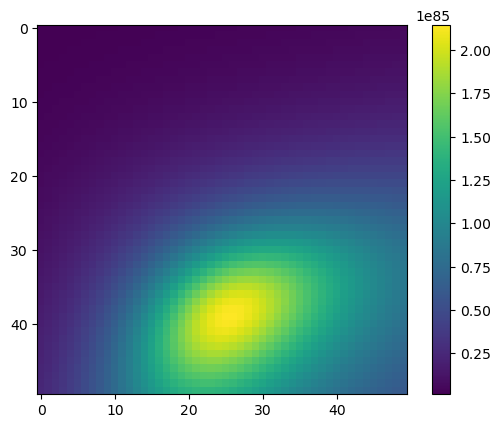

True k:7.00
True d:7.00
k:7.98
d:6.65


In [5]:
import matplotlib.colors as mpc

# Run Monte Carlo optimisation to find the optimal parameters and plot on 2d image
npss_values = np.zeros((50, 50))
k_values = np.linspace(4,9,npss_values.shape[0])
d_values = np.linspace(4,9,npss_values.shape[1])
for i, ks in tqdm(enumerate(k_values), total = k_values.shape[0]):
    for j, ds in enumerate(d_values):
        npss_values[i, j] = calculate_npss(stationary_model_data_1[0], hrv.brownian_motion_with_restoring_force(N, ks, ds, T, dt, random_seed = 100, verbose = False)[0])


plt.figure()
plt.imshow(1/npss_values, interpolation = "None")
plt.colorbar()
plt.show()

# convert argmuents to k and d values
print(f"True k:{k:.2f}")
print(f"True d:{d:.2f}")
print(f"k:{k_values[np.unravel_index(npss_values.argmin(), npss_values.shape)[0]]:.2f}")
print(f"d:{d_values[np.unravel_index(npss_values.argmin(), npss_values.shape)[1]]:.2f}")